In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# loading the dataset
dk = pd.read_csv('D:\\Downloads\\loan_prediction.csv')

In [3]:
print(dk.head())
print(dk.shape)
print(dk.info())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [4]:
#To check null values
print(dk.isnull().sum() * 100/len(dk))

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64


In [5]:
print(dk.groupby('Self_Employed')['Self_Employed'].count())
print(dk.groupby('Credit_History')['Credit_History'].count())

Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64
Credit_History
0.0     89
1.0    475
Name: Credit_History, dtype: int64


In [6]:
#To reomive loanid column which is unnecessory
dk = dk.drop('Loan_ID',axis = 1)
print(dk.head(1))

  Gender Married Dependents Education Self_Employed  ApplicantIncome  \
0   Male      No          0  Graduate            No             5849   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0         NaN             360.0             1.0   

  Property_Area Loan_Status  
0         Urban           Y  


In [7]:
# To remove nullvalues in less than 5% nullpercentcolumns
nacolumns=['Gender','Married','Dependents','LoanAmount','Loan_Amount_Term']
dk=dk.dropna(subset=nacolumns)

In [8]:
print(dk.isnull().sum() * 100/len(dk))

Gender               0.000000
Married              0.000000
Dependents           0.000000
Education            0.000000
Self_Employed        5.424955
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.000000
Loan_Amount_Term     0.000000
Credit_History       8.679928
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64


In [9]:
#To fill null values with max frequency values
print(dk['Self_Employed'].mode())

0    No
Name: Self_Employed, dtype: object


In [10]:
dk['Self_Employed']=dk['Self_Employed'].fillna(dk['Self_Employed'].mode()[0])

In [11]:
print(dk.groupby('Credit_History')['Credit_History'].count())
dk['Credit_History']=dk['Credit_History'].fillna(dk['Credit_History'].mode()[0])

Credit_History
0.0     71
1.0    434
Name: Credit_History, dtype: int64


In [12]:
print(dk.isnull().sum() * 100/len(dk))

Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64


In [13]:
#check some numerical columns and change any symbols if present
print(dk.sample(5))

    Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
490   Male      No          0  Not Graduate            No             2699   
62    Male     Yes          0  Not Graduate           Yes             2609   
452   Male     Yes          0      Graduate            No             3948   
351   Male      No          0      Graduate            No             8750   
134   Male      No          0      Graduate            No             4895   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
490             2785.0        96.0             360.0             1.0   
62              3449.0       165.0             180.0             0.0   
452             1733.0       149.0             360.0             0.0   
351             4167.0       308.0             360.0             1.0   
134                0.0       102.0             360.0             1.0   

    Property_Area Loan_Status  
490     Semiurban           Y  
62          Rural           N  
45

In [14]:
print(dk['Dependents'].unique())

['1' '0' '2' '3+']


In [15]:
dk['Dependents'] = dk['Dependents'].replace(to_replace='3+',value='4')
print(dk['Dependents'].unique())

['1' '0' '2' '4']


In [16]:
print(dk['Property_Area'].unique())

['Rural' 'Urban' 'Semiurban']


In [17]:
#To convert categorical into numerical
from sklearn.preprocessing import LabelEncoder
lr = LabelEncoder()
dk['Property_Area'] = lr.fit_transform(dk['Property_Area'])
dk['Gender'] = lr.fit_transform(dk['Gender'])
dk['Married'] = lr.fit_transform(dk['Married'])
dk['Education'] = lr.fit_transform(dk['Education'])
dk['Self_Employed'] = lr.fit_transform(dk['Self_Employed'])
dk['Loan_Status'] = lr.fit_transform(dk['Loan_Status'])

In [18]:
print(dk.head(10))

    Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1        1        1          1          0              0             4583   
2        1        1          0          0              1             3000   
3        1        1          0          1              0             2583   
4        1        0          0          0              0             6000   
5        1        1          2          0              1             5417   
6        1        1          0          1              0             2333   
7        1        1          4          0              0             3036   
8        1        1          2          0              0             4006   
9        1        1          1          0              0            12841   
10       1        1          2          0              0             3200   

    CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
1              1508.0       128.0             360.0             1.0   
2         

In [19]:
print(dk.info())

<class 'pandas.core.frame.DataFrame'>
Index: 553 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             553 non-null    int32  
 1   Married            553 non-null    int32  
 2   Dependents         553 non-null    object 
 3   Education          553 non-null    int32  
 4   Self_Employed      553 non-null    int32  
 5   ApplicantIncome    553 non-null    int64  
 6   CoapplicantIncome  553 non-null    float64
 7   LoanAmount         553 non-null    float64
 8   Loan_Amount_Term   553 non-null    float64
 9   Credit_History     553 non-null    float64
 10  Property_Area      553 non-null    int32  
 11  Loan_Status        553 non-null    int32  
dtypes: float64(4), int32(6), int64(1), object(1)
memory usage: 43.2+ KB
None


In [20]:
print(dk[['ApplicantIncome','CoapplicantIncome']].describe())

       ApplicantIncome  CoapplicantIncome
count       553.000000         553.000000
mean       5350.018083        1659.119204
std        5965.429068        3043.448229
min         150.000000           0.000000
25%        2889.000000           0.000000
50%        3812.000000        1213.000000
75%        5815.000000        2306.000000
max       81000.000000       41667.000000


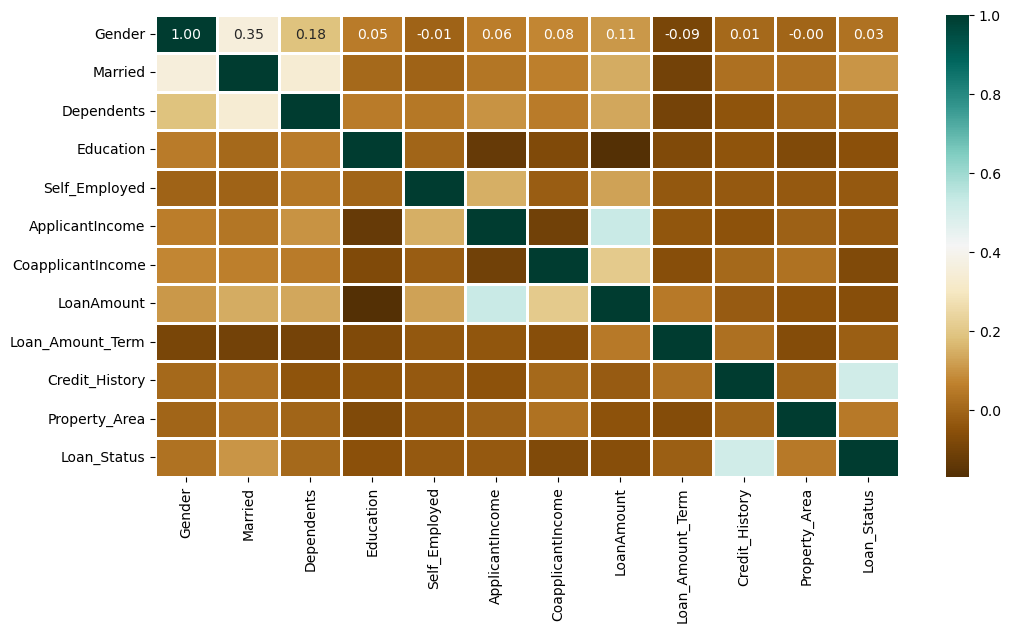

In [21]:
# heatmap to see corelation b/w features.
plt.figure(figsize=(12,6))
sns.heatmap(dk.corr(),cmap='BrBG',fmt='.2f',linewidths=2,annot=True)
plt.show()

In [22]:
# Defining feature column and Target column
x = dk.drop('Loan_Status',axis=1)
y = dk['Loan_Status']

In [23]:
print(y)

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 553, dtype: int32


In [24]:
# To give scaling to numbers
sccol = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
x[sccol] = st.fit_transform(x[sccol])
print(x[sccol])

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term
1          -0.128694          -0.049699   -0.214368          0.279961
2          -0.394296          -0.545638   -0.952675          0.279961
3          -0.464262           0.229842   -0.309634          0.279961
4           0.109057          -0.545638   -0.059562          0.279961
5           0.011239           0.834309    1.440866          0.279961
..               ...                ...         ...               ...
609        -0.411075          -0.545638   -0.893134          0.279961
610        -0.208727          -0.545638   -1.262287         -2.468292
611         0.456706          -0.466709    1.274152          0.279961
612         0.374659          -0.545638    0.488213          0.279961
613        -0.128694          -0.545638   -0.154828          0.279961

[553 rows x 4 columns]


In [25]:
import warnings
warnings.filterwarnings('ignore')

#Model building
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import numpy as np

In [26]:
modelset ={}
def model_acscore(model,x,y):
    xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.20,random_state=42)
    model.fit(xtrain,ytrain)
    y_pred = model.predict(xtest)
    print(f'{model} accuracy is {accuracy_score(ytest,y_pred)}')

    score = cross_val_score(model,x,y,cv=5)
    print(f'{model} Avg crossvalscore is {np.mean(score)}')
    modelset[model] = round(np.mean(score)*100,2)

In [27]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model_acscore(model1,x,y)
print(modelset)

LogisticRegression() accuracy is 0.7927927927927928
LogisticRegression() Avg crossvalscore is 0.802964782964783
{LogisticRegression(): 80.3}


In [28]:
# Support vector machine
from sklearn import svm
model2 = svm.SVC()
model_acscore(model2,x,y)

SVC() accuracy is 0.8018018018018018
SVC() Avg crossvalscore is 0.7920720720720721


In [29]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier()
model_acscore(model3,x,y)

DecisionTreeClassifier() accuracy is 0.7207207207207207
DecisionTreeClassifier() Avg crossvalscore is 0.7015397215397214


In [30]:
# Random forest
from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier()
model_acscore(model4,x,y)

RandomForestClassifier() accuracy is 0.7747747747747747
RandomForestClassifier() Avg crossvalscore is 0.7848484848484848


In [31]:
#Gradient boosting
from sklearn.ensemble import GradientBoostingClassifier
model5 = GradientBoostingClassifier()
model_acscore(model5,x,y)

GradientBoostingClassifier() accuracy is 0.7747747747747747
GradientBoostingClassifier() Avg crossvalscore is 0.7739885339885341


In [32]:
print(modelset)
print('****************************')

{LogisticRegression(): 80.3, SVC(): 79.21, DecisionTreeClassifier(): 70.15, RandomForestClassifier(): 78.48, GradientBoostingClassifier(): 77.4}
****************************


In [33]:
# Hyper parameter tuning for logistic reg
from sklearn.model_selection import RandomizedSearchCV
logr_para={'C':np.logspace(-4,4,20),
           'solver': ['liblinear','lbfgs','newton-cholesky']}
rs_logr = RandomizedSearchCV(LogisticRegression(),
                           param_distributions=logr_para,
                           n_iter=20,cv=5,verbose=True)
rs_logr.fit(x,y)
print(rs_logr.best_score_)
print(rs_logr.best_params_)
print('************************')

Fitting 5 folds for each of 20 candidates, totalling 100 fits
0.802964782964783
{'solver': 'liblinear', 'C': 3792.690190732246}
************************


In [34]:
# Hyper parameter tuning for svm model
svm_para={'C':[0.25,0.50,0.75,1],
          'kernel':['linear','rbf']}
rs_svm = RandomizedSearchCV(svm.SVC(),param_distributions=svm_para,
                            cv=5,n_iter=20,verbose=True)
rs_svm.fit(x,y)
print(rs_svm.best_score_)
print(rs_svm.best_params_)
print('***********************')

Fitting 5 folds for each of 8 candidates, totalling 40 fits
0.8066011466011467
{'kernel': 'linear', 'C': 0.25}
***********************


In [35]:
 # Hyper parameter for Random forest classifier
rf_para = {'n_estimators':np.arange(10,1000,10),
           'max_features':['auto','sqrt'],
           'max_depth':[None,3,5,10,20,30],
           'min_samples_split':[2,5,20,50,100],
           'min_samples_leaf':[1,2,5,10]}

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_para,
                           cv=5,n_iter=20,verbose=True)
rs_rf.fit(x,y)
print(rs_rf.best_score_)
print(rs_rf.best_params_)
print('***********************')

Fitting 5 folds for each of 20 candidates, totalling 100 fits
0.8066011466011467
{'n_estimators': 190, 'min_samples_split': 20, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 3}
***********************


# selecting Random forest as final best model and use its best parameters
# so we selected Random forest classifier is the best model for this dataset
  # its accuracy score is 80.84

In [36]:
rf_final =RandomForestClassifier(n_estimators=270,
                           min_samples_split=5,
                           min_samples_leaf=5,
                           max_features='sqrt',
                           max_depth=5)
rf_final.fit(x,y)
model_acscore(rf_final,x,y)

RandomForestClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=5,
                       n_estimators=270) accuracy is 0.8018018018018018
RandomForestClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=5,
                       n_estimators=270) Avg crossvalscore is 0.8066011466011467


In [38]:
# save this final model using joblib
import joblib
joblib.dump(rf_final,'D:\\Downloads\\joblib_loan_predict2')
model11=joblib.load('D:\\Downloads\\joblib_loan_predict2')

In [39]:
dfpred = pd.DataFrame({
    'Gender':1,
    'Married':1,
    'Dependents':2,
    'Education':0,
    'Self_Employed':0,
    'ApplicantIncome':2889,
    'CoapplicantIncome':0.0,
    'LoanAmount':45,
    'Loan_Amount_Term':180,
    'Credit_History':0,
    'Property_Area':1},index=[0])
target=model11.predict(dfpred)
if target ==1:print('loan will be approved')
else: print('loan can not be approved')

loan can not be approved
